# Importing Packages

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import gensim.models
import os
import nltk
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


from gensim.test.utils import datapath
from nltk.stem import WordNetLemmatizer
from gensim import utils
from os import listdir
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, manifold, decomposition
from sklearn.metrics import (
    adjusted_rand_score,
    confusion_matrix,
    classification_report,
    f1_score,
)
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
from matplotlib.image import imread

In [168]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("pastel")

[nltk_data] Downloading package punkt to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amelie-
[nltk_data]     dzovinar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing Data

In [169]:
raw_data = pd.read_csv("data/flipkart_com-ecommerce_sample_1050.csv")
print(raw_data.shape)

(1050, 15)


Creating image list

In [170]:
path = "data/Images/"
image_list = [file for file in listdir(path)]
print(len(image_list))

1050


In [171]:
raw_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [172]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

There is very little missing data and it concerns columns that will not be useful moving forward.

In [173]:
raw_data.describe(include="all")

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1049.000000,1049.000000,1050,1050,1050,1050,1050,712,1049
unique,1050,149,1050,1050,642,1050,NaN,NaN,1050,2,1050,27,27,490,984
top,55b85ea15a1536d46b7190ad6fff8ce7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,NaN,NaN,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,150,1,1,56,1,NaN,NaN,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,NaN,2186.197331,1584.527169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7639.229411,7475.099680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,555.000000,340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,999.000000,600.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,1199.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
raw_data.duplicated(subset="uniq_id").sum()

0

# Text Analysis

Identifying the product's category from the category tree

In [175]:
def extract_category(df):
    df["category"] = df["product_category_tree"].apply(
        lambda category_tree: category_tree.split(" >>")[0].replace('["', "")
    )

    return df

In [176]:
data = extract_category(raw_data)

In [177]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wall

In [178]:
data["category"].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [179]:
categories = data["category"].unique()

le = preprocessing.LabelEncoder()
le.fit(data["category"])
data["encoded_category"] = le.transform(data["category"])
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,encoded_category
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,4


In [180]:
data.groupby("encoded_category").count()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category
encoded_category,,,,,,,,,,,,,,,,
0,150,150,150,150,150,150,149,149,150,150,150,150,150,134,150,150
1,150,150,150,150,150,150,150,150,150,150,150,150,150,41,150,150
2,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
3,150,150,150,150,150,150,150,150,150,150,150,150,150,148,149,150
4,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150,150
5,150,150,150,150,150,150,150,150,150,150,150,150,150,79,150,150
6,150,150,150,150,150,150,150,150,150,150,150,150,150,10,150,150


In [181]:
example_description = data["description"][0]
example_description

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

## Tokenization

In [182]:
nltk.word_tokenize(example_description)

['Key',
 'Features',
 'of',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'Floral',
 'Curtain',
 ',',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 '(',
 '213',
 'cm',
 'in',
 'Height',
 ',',
 'Pack',
 'of',
 '2',
 ')',
 'Price',
 ':',
 'Rs',
 '.',
 '899',
 'This',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors.This',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 '%',
 'high',
 'quality',
 'polyester',
 'fabric.It',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'Metal',
 'Ring.It',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving.This',
 'curtain',
 'is',
 'ant-',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance.Give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 '.',
 'The',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 '.',
 

In [183]:
tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
tokenizer.tokenize(example_description)

['Key',
 'Features',
 'of',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'Floral',
 'Curtain',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'cm',
 'in',
 'Height',
 'Pack',
 'of',
 'Price',
 'Rs',
 'This',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors',
 'This',
 'curtain',
 'is',
 'made',
 'from',
 'high',
 'quality',
 'polyester',
 'fabric',
 'It',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'Metal',
 'Ring',
 'It',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving',
 'This',
 'curtain',
 'is',
 'ant',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance',
 'Give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 'The',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 'These',
 'contemporary',
 'eyelet',
 'and',
 'valance',
 'curtai

In [184]:
def tokenize_description(description):
    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    return tokenizer.tokenize(description.lower())


def unique_word_count(tokenized_description):
    return len(nltk.FreqDist(tokenized_description).keys())

In [185]:
data["tokenized"] = data["description"].apply(
    lambda x: tokenize_description(x))
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

In [186]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,encoded_category,tokenized,description_total_word_count,description_unique_word_count
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,"[key, features, of, elegance, polyester, multi...",226,128
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0,"[specifications, of, sathiyas, cotton, bath, t...",68,44
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0,"[key, features, of, eurospa, cotton, terry, fa...",201,115
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,"[key, features, of, santosh, royal, fashion, c...",124,59
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,4,"[key, features, of, jaipur, print, cotton, flo...",188,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,0,"[oren, empower, extra, large, self, adhesive, ...",411,140
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,0,"[wallmantra, large, vinyl, sticker, sticker, p...",285,98
1047,5912e037d1277

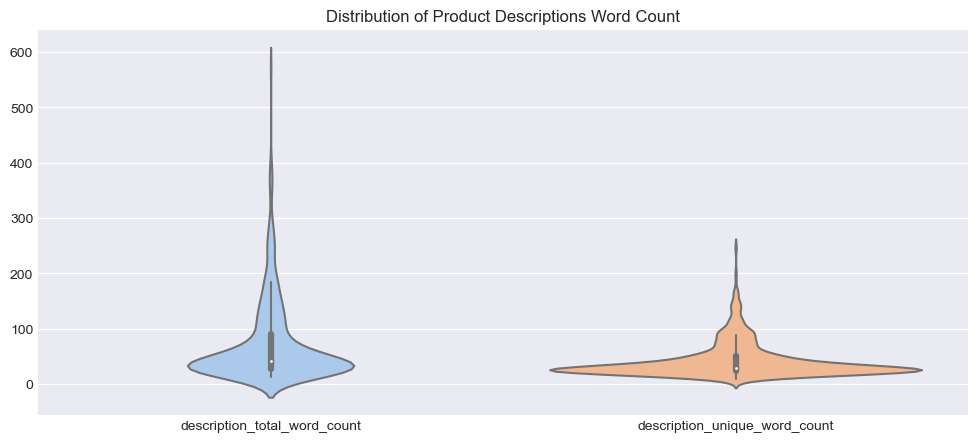

In [187]:
plt.figure(figsize=(12, 5))
sns.violinplot(data[["description_total_word_count", "description_unique_word_count"]])
plt.title("Distribution of Product Descriptions Word Count")
plt.show()

In [188]:
def plot_word_count_by_category(data):
    word_count_by_category = (
        data[
            [
                "description_total_word_count",
                "description_unique_word_count",
                "category",
            ]
        ]
        .groupby("category")
        .mean()
        .sort_values(by="description_total_word_count")
    )

    plt.figure(figsize=(10, 6))
    plt.barh(
        word_count_by_category["description_total_word_count"].index,
        word_count_by_category["description_total_word_count"].values,
        color="#7871AA",
        label="Total Word Count",
    )
    plt.barh(
        word_count_by_category["description_unique_word_count"].index,
        word_count_by_category["description_unique_word_count"].values,
        color="#AA9FB1",
        label="Unique Word Count",
    )
    plt.xlabel("Word Count")
    plt.legend()
    plt.title("Word Count by Category")
    plt.show()

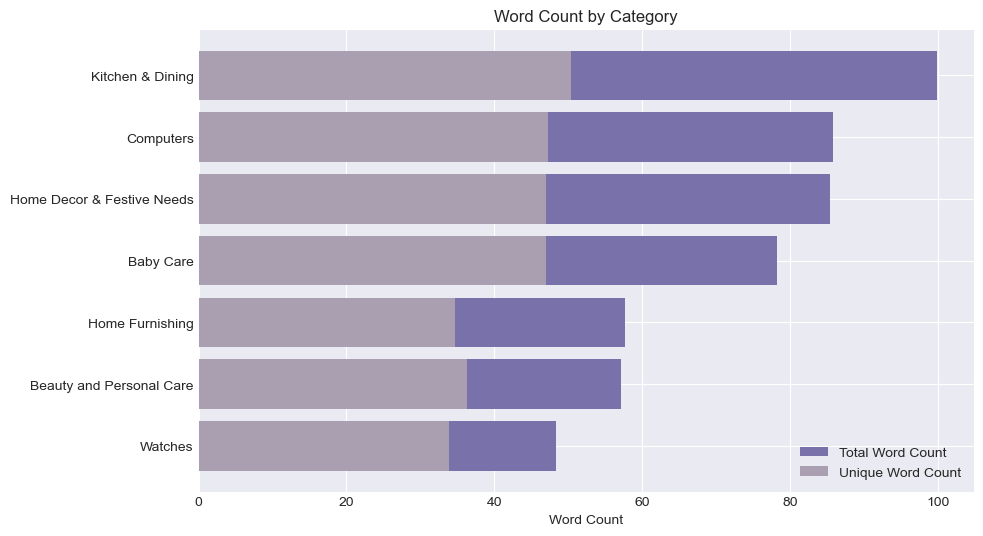

In [189]:
plot_word_count_by_category(data)

The kitchen and dining category seems to have more detailed descriptions as they contain about 100 total words on average and has the highest unique word count. 

Watches on the other hand have more concise descriptions 

## Removing stop words

In [190]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,encoded_category,tokenized,description_total_word_count,description_unique_word_count
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,"[key, features, of, elegance, polyester, multi...",226,128
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0,"[specifications, of, sathiyas, cotton, bath, t...",68,44
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0,"[key, features, of, eurospa, cotton, terry, fa...",201,115
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,"[key, features, of, santosh, royal, fashion, c...",124,59
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,4,"[key, features, of, jaipur, print, cotton, flo...",188,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,0,"[oren, empower, extra, large, self, adhesive, ...",411,140
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,0,"[wallmantra, large, vinyl, sticker, sticker, p...",285,98
1047,5912e037d1277

In [191]:
product_descriptions = data[
    ["tokenized", "description_total_word_count", "description_unique_word_count"]
]
product_descriptions

,tokenized,description_total_word_count,description_unique_word_count
0,"[key, features, of, elegance, polyester, multi...",226,128
1,"[specifications, of, sathiyas, cotton, bath, t...",68,44
2,"[key, features, of, eurospa, cotton, terry, fa...",201,115
3,"[key, features, of, santosh, royal, fashion, c...",124,59
4,"[key, features, of, jaipur, print, cotton, flo...",188,95
...,...,...,...
1045,"[oren, empower, extra, large, self, adhesive, ...",411,140
1046,"[wallmantra, large, vinyl, sticker, sticker, p...",285,98
1047,"[buy, uberlyfe, extra, large, pigmented, polyv...",35,27
1048,"[buy, wallmantra, medium, vinyl, sticker, stic...",29,23


Identifying most frequent words

In [192]:
total_frequency = nltk.Counter()
for key, value in product_descriptions["tokenized"].items():
    total_frequency += nltk.FreqDist(value)

total_frequency_df = pd.DataFrame.from_dict(
    total_frequency, orient="index", columns=["word_count"]
).sort_values(by="word_count", ascending=False)

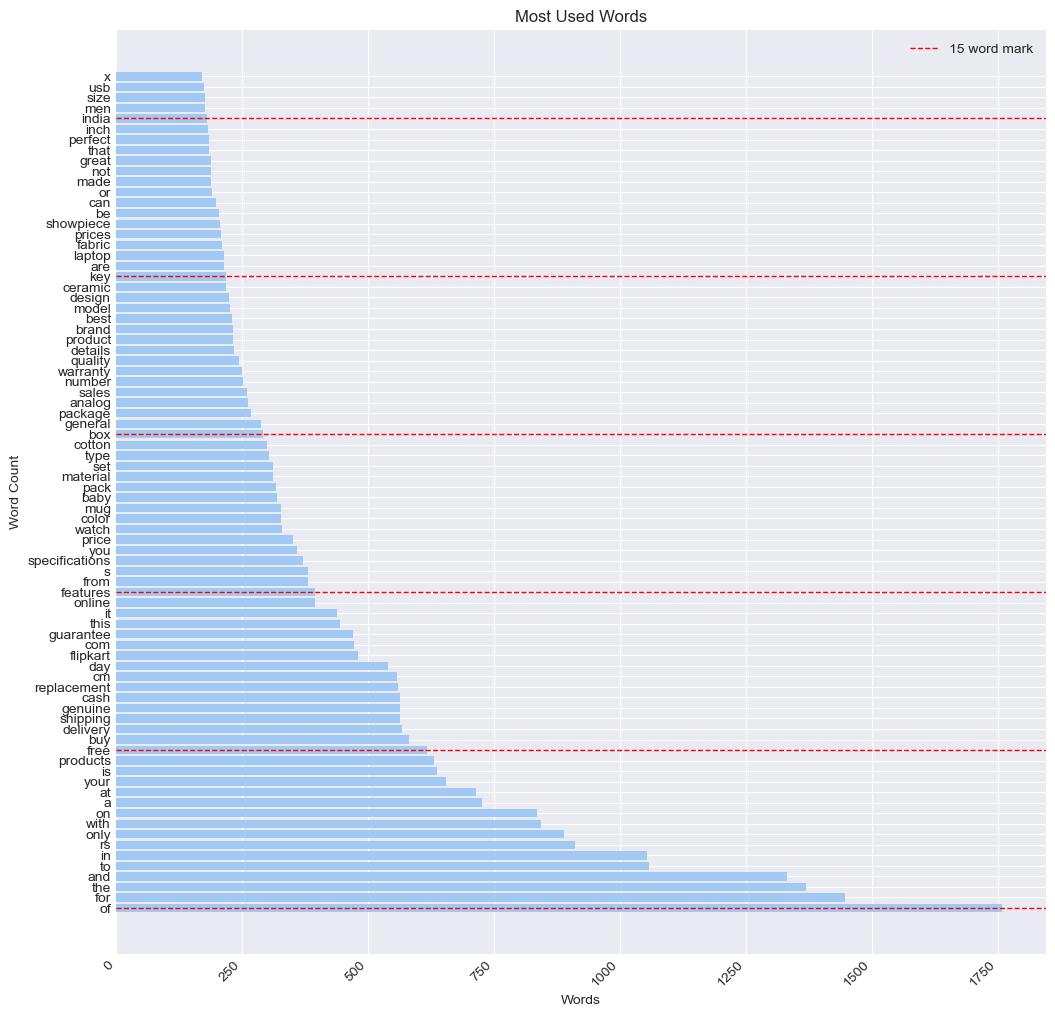

In [193]:
most_frequent_words = total_frequency_df.head(80)

plt.figure(figsize=(12, 12))
plt.barh(most_frequent_words.index, most_frequent_words["word_count"])
plt.xlabel("Words")
plt.ylabel("Word Count")
plt.title("Most Used Words")
plt.xticks(rotation=45, ha="right")
for y in range(0, len(most_frequent_words), 15):
    plt.axhline(
        y,
        color="red",
        linestyle="--",
        linewidth=1,
        label="15 word mark" if y == 0 else "",
    )
plt.legend()
plt.show()

In [194]:
stopwords = total_frequency_df.head(50).index
stopwords

Index(['of', 'for', 'the', 'and', 'to', 'in', 'rs', 'only', 'with', 'on', 'a',
       'at', 'your', 'is', 'products', 'free', 'buy', 'delivery', 'shipping',
       'genuine', 'cash', 'replacement', 'cm', 'day', 'flipkart', 'com',
       'guarantee', 'this', 'it', 'online', 'features', 'from', 's',
       'specifications', 'you', 'price', 'watch', 'color', 'mug', 'baby',
       'pack', 'material', 'set', 'type', 'cotton', 'box', 'general',
       'package', 'analog', 'sales'],
      dtype='object')

In [195]:
unique_words = [word for word, count in total_frequency.items() if count <= 1]
print(len(unique_words))

1497


In [196]:
stopwords = np.append(stopwords, unique_words)
len(stopwords)

1547

In [197]:
print(stopwords)

['of' 'for' 'the' ... 'shops' 'deeper' 'oren']


In [198]:
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words("english")))

In [199]:
def filter_out_stopwords(tokens, sw):
    filtered_tokens = list()
    filtered_tokens += [word for word in tokens if not word in list(sw)]
    return filtered_tokens

In [200]:
data["tokenized"] = data["description"].apply(
    lambda x: filter_out_stopwords(tokenize_description(x), sw)
)
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

In [201]:
data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category,encoded_category,tokenized,description_total_word_count,description_unique_word_count
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,"[key, elegance, polyester, multicolor, abstrac...",118,78
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0,"[sathiyas, bath, towel, bath, towel, red, yell...",46,28
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0,"[key, eurospa, terry, face, towel, size, small...",119,71
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,"[key, santosh, royal, fashion, printed, king, ...",89,39
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,4,"[key, jaipur, print, floral, king, sized, doub...",124,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,0,"[empower, extra, large, self, adhesive, sticke...",220,94
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,0,"[wallmantra, large, vinyl, sticker, sticker, b...",149,62
1047,5912e037d12774bb7

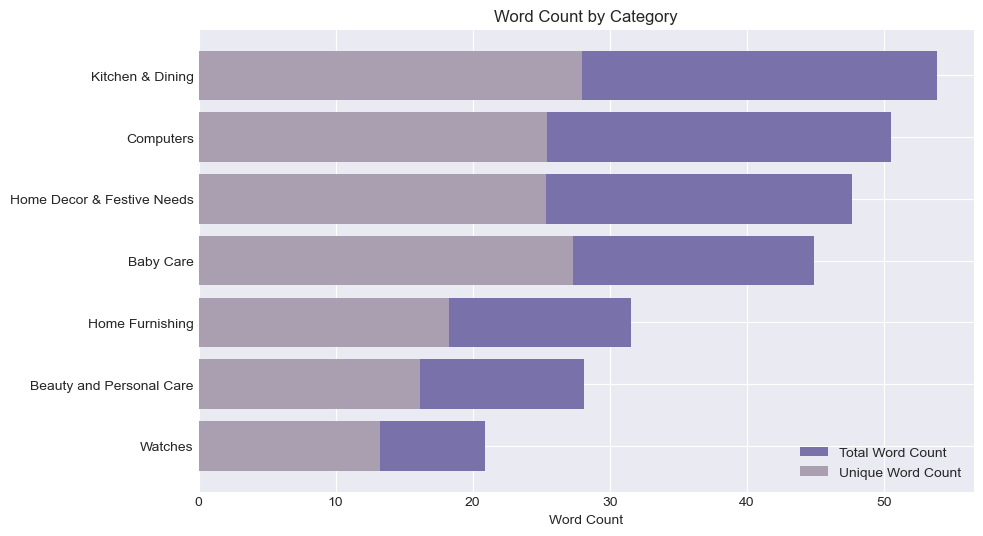

In [202]:
plot_word_count_by_category(data)

When filtering out stopwords, computers have longer descriptions on average than home decor objects. Baby care products have descriptions with the highest unique word count.

## Lemmatization

In [203]:
def tokenize_description(description):
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = list()

    tokenizer = nltk.RegexpTokenizer(r"[a-zA-Z]+")
    tokens = tokenizer.tokenize(description.lower())

    filtered_tokens += [
        lemmatizer.lemmatize(word) for word in tokens if word not in list(sw)
    ]
    return [word for word in filtered_tokens if len(word) > 2]

In [204]:
data["tokenized"] = data["description"].apply(
    lambda x: tokenize_description(x))
data["description_total_word_count"] = data["tokenized"].apply(len)
data["description_unique_word_count"] = data["tokenized"].apply(
    lambda x: unique_word_count(x)
)

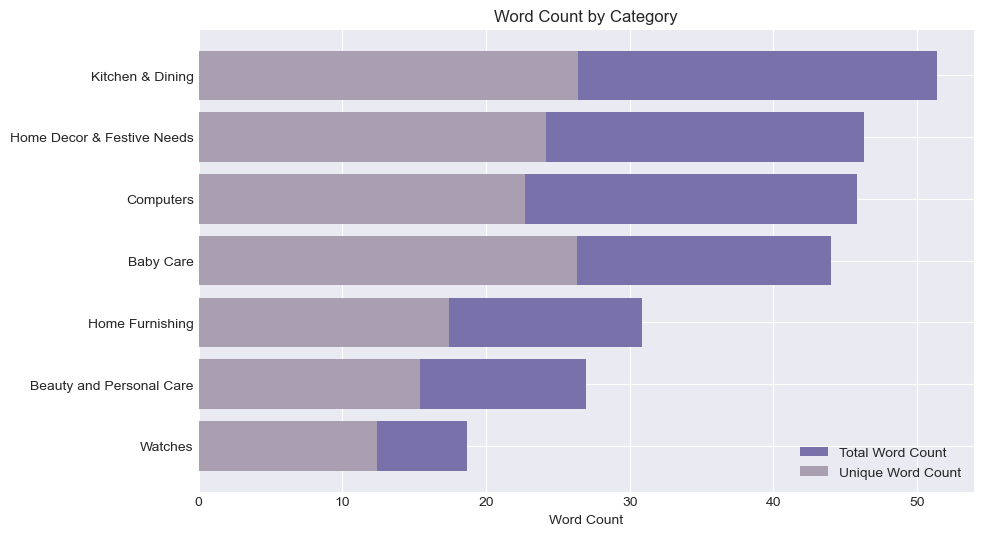

In [205]:
plot_word_count_by_category(data)

## Bag of Words

### TF-IDF

Using the tf-idf metric to compare the different vocabulary used for each description and grouping them by category using TSNE

In [206]:
tfidf = TfidfVectorizer(tokenizer=tokenize_description, stop_words=list(sw))
values = tfidf.fit_transform(data["description"])

/Users/amelie-dzovinar/Dev/anaconda3/envs/p6/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TSNE

In [207]:
def plot_tsne(values):
    tsne = manifold.TSNE(
        n_components=2, perplexity=30, n_iter=2000, init="random", random_state=42
    )
    X_tsne = tsne.fit_transform(values)
    df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
    df_tsne["category"] = data["category"]

    kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto")
    kmeans.fit(X_tsne)

    print(len(kmeans.labels_))

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=df_tsne["category"],
        data=df_tsne,
        legend="brief",
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
        ax=axes[0]
    )
    axes[0].set_title('TSNE by True Categories')
    axes[0].legend(prop={"size": 10}, bbox_to_anchor=(1, 1))

    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=kmeans.labels_,
        data=df_tsne,
        legend="brief",
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
        ax=axes[1]
    )
    axes[1].set_title('TSNE by Kmeans Labels')
    axes[1].legend(prop={"size": 12}, bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

    print('The Adjusted Rand Index is: ', adjusted_rand_score(
        data.encoded_category, kmeans.labels_))

1050


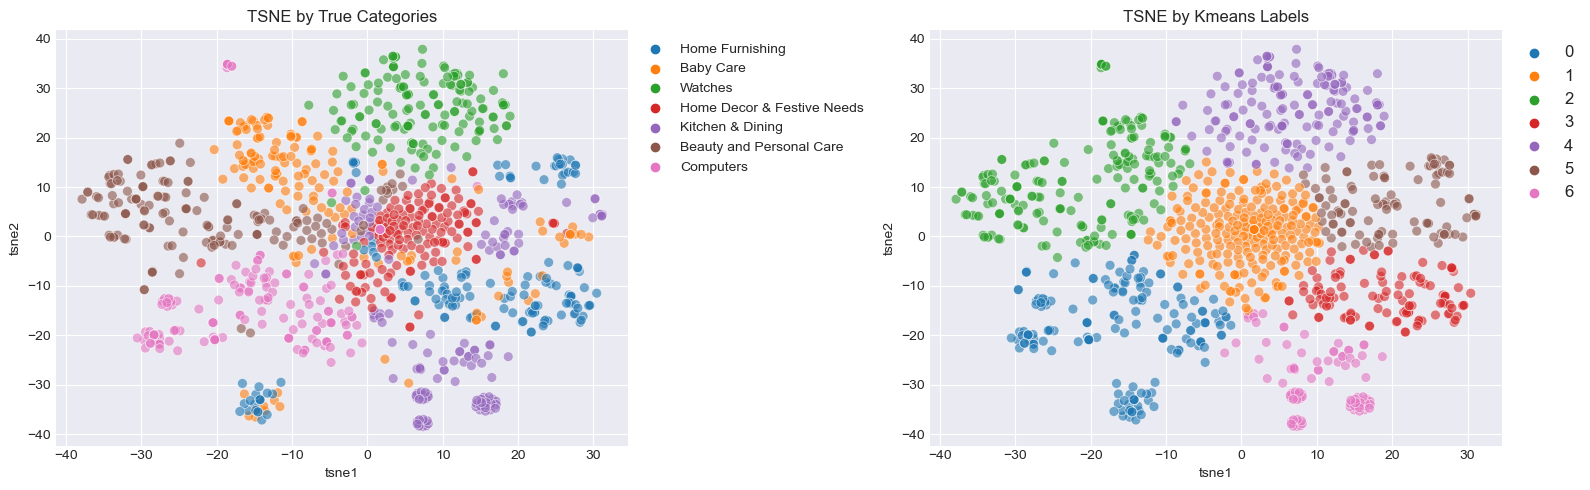

The Adjusted Rand Index is:  0.45505827245968794


In [208]:
plot_tsne(values)

The kmeans model supports the feasability of a classification engine as it was able to create some clusters that are quite similar to the clusters from the true categories. 
Cluster 3, for example, which represents the watches category, is quite distinct, as well as cluster 4, home decor. 

The ARI of .5 matches with the visual representations of the clusters and also supports the feasability of the classification engine. 

SVM

In [209]:
len(tfidf.vocabulary_)

3126

In [210]:
feature_names = tfidf.get_feature_names_out()
non_stopwords = [word for word in feature_names if word not in list(sw)]

In [211]:
df_svm = pd.DataFrame(values.todense().tolist(),
                      columns=tfidf.get_feature_names_out())
df_svm

,aapno,aari,ability,abkl,able,abode,abroad,absorbency,absorbent,absorbing,...,youth,youthful,yuva,zero,zinc,zingalalaa,zipper,zone,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068321,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
X_train, X_test, y_train, y_test = train_test_split(
    df_svm, data.encoded_category, test_size=0.2
)

svc = LinearSVC()
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)

encoded_categories = data.groupby("category").first().reset_index()
results = pd.DataFrame(
    f1_score(y_test, y_predicted, average=None), columns=["F1 Score"]
)
results["Category"] = encoded_categories.category
results

,F1 Score,Category
0,0.929577,Baby Care
1,0.916667,Beauty and Personal Care
2,0.984615,Computers
3,0.931507,Home Decor & Festive Needs
4,0.981132,Home Furnishing
5,0.941176,Kitchen & Dining
6,0.983051,Watches


In [213]:
adjusted_rand_score(y_test, y_predicted)

0.8887482129541311

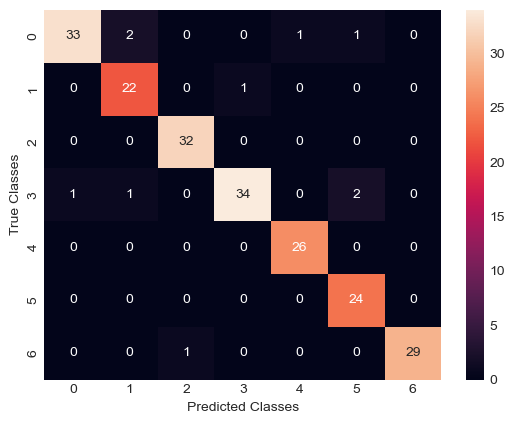

In [214]:
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True)
plt.ylabel("True Classes")
plt.xlabel("Predicted Classes")
plt.show()

The results of the SVM model are conclusive and therefore confirms the feasability of the classification engine based on the product's descriptions. 

Latent Dirichlet Allocation

In [215]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=7,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=42,
)

lda.fit(values)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=7, random_state=42)

In [216]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(
            " ".join(
                [feature_names[i] for i in topic.argsort()[: -no_top_words - 1 : -1]]
            )
        )


no_top_words = 10
display_topics(lda, tfidf.get_feature_names_out(), no_top_words)

Topic 0:
sticker vinyl medium wallmantra best large wall kadhai walldesign uberlyfe
Topic 1:
laptop battery cell lowest hair adapter spf pavilion warranty lapguard
Topic 2:
men discount girl india woman great polyester boy eyelet detail
Topic 3:
skin laptop towel multicolor showpiece ceramic inch combo abstract print
Topic 4:
usb router wireless link hub denver combo fan trendnet dsl
Topic 5:
combo playboy yardley london wild berlin york creme tablet lace
Topic 6:
tenda combo edimax mxofere polyvinyl film pigmented kit uberlyfe soap


## Word Embedding

### Word2Vec

Training own model

In [339]:
model = gensim.models.Word2Vec(min_count=5, window=10, seed=42, vector_size=300)
sentences = [tokenize_description(text) for text in data["description"]]
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=100)
print("Corpus Count: ", model.corpus_count)

Corpus Count:  1050


In [328]:
vec_computer = model.wv["computer"]
vec_computer

array([ 2.0152733 , -0.26346073, -2.2482636 ,  1.5481627 , -1.303334  ,
        0.44959146,  1.6162035 ,  1.5277562 ,  0.11701307, -0.12592469,
       -2.1810577 ,  1.8513485 ,  1.2759128 ,  0.8465711 , -1.11788   ,
       -3.1779716 ,  2.474884  , -0.05813945,  1.1853856 , -0.03830045,
        0.7271085 ,  1.4430269 ,  0.36326334, -0.30471495,  0.60218596,
        2.952666  , -1.2728083 , -0.15600187,  0.73270375,  0.33505768,
       -1.2396806 , -1.1134183 , -0.5524602 ,  1.1384864 , -1.3793528 ,
       -1.8772739 ,  0.68315095, -1.0362775 ,  1.4397502 , -2.4572291 ,
       -1.6982684 , -3.2576377 ,  2.2122202 , -1.2410585 , -1.1401039 ,
        0.53923255,  0.20936775, -0.9394445 , -0.14832817,  3.2798626 ,
       -0.9271156 , -2.6863873 , -1.3417193 ,  1.2777035 ,  2.4507554 ,
        1.1004064 , -0.06714061, -0.5491807 , -0.06115534,  1.589268  ,
        0.5316385 ,  0.89855444, -1.1677879 ,  0.13260643, -1.9463354 ,
       -1.3883085 ,  0.57991254,  1.1321738 ,  2.193732  ,  1.80

In [340]:
model.wv.most_similar("computer")

[('vacuum', 0.8413903713226318),
 ('attachment', 0.7612980604171753),
 ('cleaner', 0.7509620785713196),
 ('desktop', 0.7311274409294128),
 ('connect', 0.6895154714584351),
 ('port', 0.6579617261886597),
 ('device', 0.6245661377906799),
 ('air', 0.6207524538040161),
 ('usb', 0.6125427484512329),
 ('simply', 0.5921471118927002)]

In [345]:
model.wv.most_similar("curtain")

[('eyelet', 0.6351701617240906),
 ('door', 0.5736741423606873),
 ('ring', 0.5285888910293579),
 ('attention', 0.4991157352924347),
 ('polyester', 0.4535391330718994),
 ('appeal', 0.4244282841682434),
 ('appealing', 0.4040113687515259),
 ('leave', 0.3999141752719879),
 ('vibrant', 0.3945801258087158),
 ('comfort', 0.3924693465232849)]

In [347]:
model.wv.similarity(w1="decor", w2="furnishing")

0.417913

In [348]:
model.wv.similarity(w1="watch", w2="computer")

-0.00067111105

In [349]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 20:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/1413 is design
word #1/1413 is number
word #2/1413 is warranty
word #3/1413 is quality
word #4/1413 is detail
word #5/1413 is girl
word #6/1413 is inch
word #7/1413 is brand
word #8/1413 is laptop
word #9/1413 is product
word #10/1413 is best
word #11/1413 is key
word #12/1413 is model
word #13/1413 is ceramic
word #14/1413 is fabric
word #15/1413 is price
word #16/1413 is showpiece
word #17/1413 is size
word #18/1413 is made
word #19/1413 is great


Evaluating semantic similarities using the academic dataset WS-353

In [350]:
model.wv.evaluate_word_pairs(datapath("wordsim353.tsv"))

(PearsonRResult(statistic=0.3116210173961805, pvalue=0.14776514712305086),
 SignificanceResult(statistic=0.2984189723320158, pvalue=0.16663080050326307),
 93.48441926345609)

In [229]:
# word_vectors = []
# for line in list(sentences):
#     vector = [model.wv[word]
#               for word in list(line) if word in model.wv.index_to_key]
#     if vector:
#         word_vectors.append(vector)

Creating padded sequences from tokenized descriptions

In [341]:
max_sentence_length = max(len(sentence) for sentence in sentences)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(
    tokenizer.texts_to_sequences(sentences), maxlen=max_sentence_length, padding="post"
)

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Number of unique words: 3159


In [342]:
w2v_size = model.wv.vector_size
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in model.wv.index_to_key:
        j += 1
        embedding_vector = model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model.wv[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Word embedding rate :  0.4474
Embedding matrix: (3159, 300)


In [343]:
input = Input(shape=(len(x_sentences), max_sentence_length), dtype='float64')
word_input = Input(shape=(max_sentence_length,), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=max_sentence_length)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input], word_vec)

embed_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 302)]             0         
                                                                 
 embedding_13 (Embedding)    (None, 302, 300)          947700    
                                                                 
 global_average_pooling1d_13  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 947,700
Trainable params: 947,700
Non-trainable params: 0
_________________________________________________________________


33/33 [==============================] - 0s 2ms/step
1050


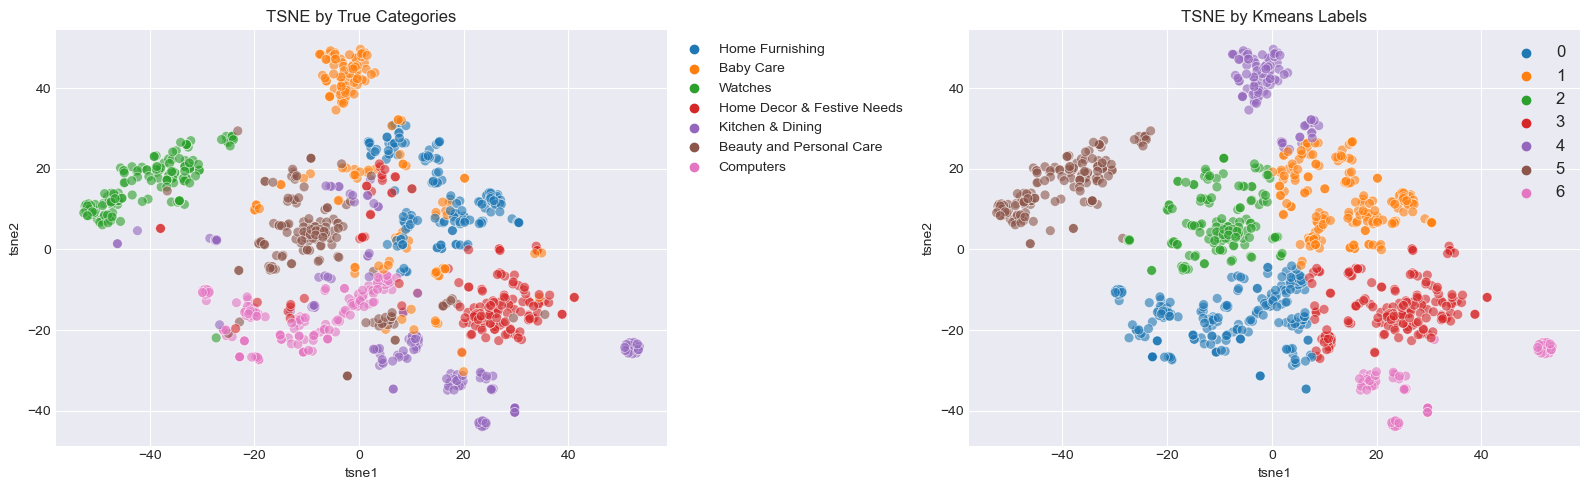

The Adjusted Rand Index is:  0.5686717244757018


In [344]:
plot_tsne(embed_model.predict(x_sentences))

# Image Analysis

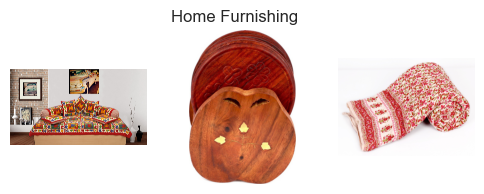

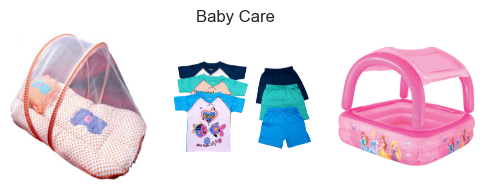

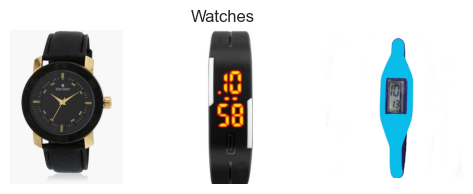

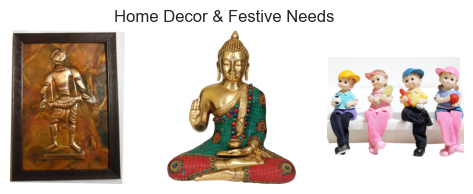

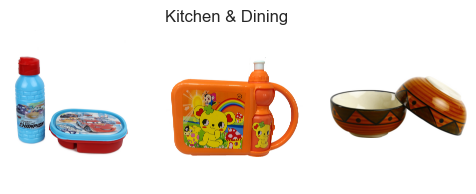

KeyboardInterrupt: 

In [234]:
def list_images_by_category(category):
    return [
        data["image"][i] for i in range(len(data)) if data["category"][i] == category
    ]


home_furnishing_images = list_images_by_category("Home Furnishing")
baby_care_images = list_images_by_category("Baby Care")
watches_images = list_images_by_category("Watches")
home_decor_images = list_images_by_category("Home Decor & Festive Needs")
kitchen_images = list_images_by_category("Kitchen & Dining")
beauty_images = list_images_by_category("Beauty and Personal Care")
computers_images = list_images_by_category("Computers")

for name in data["category"].unique():
    fig = plt.figure(figsize=(6, 2))
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_images_by_category(name)[i + 10]
        image = imread(path + filename)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.suptitle(name)
    plt.show()

## SIFT

Identifying keypoints and associated descriptors for each image 

In [ ]:
sift = cv2.SIFT_create()
sift_keypoints = []
for image_num in range(len(image_list)):
    image = cv2.imread(path + image_list[image_num], 0)
    image = cv2.equalizeHist(image)
    keypoints, descriptors = sift.detectAndCompute(image, None)
    sift_keypoints.append(descriptors)

sift_keypoints_by_image = np.asarray(sift_keypoints, dtype="object")
sift_keypoints_all = np.concatenate(sift_keypoints_by_image, axis=0)

KeyboardInterrupt: 

Example of an image's descriptors

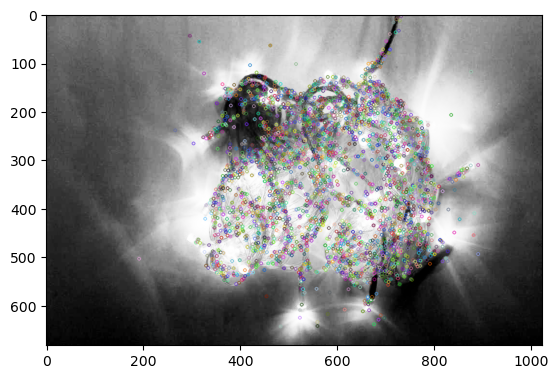

Descriptors :  (3025, 128)

[[ 34.  12.   0. ...   0.   0.   0.]
 [ 25.  19.   0. ...   0.   0.   0.]
 [  0.   3.   9. ...   1.   2.  61.]
 ...
 [ 73.   0.   0. ...   3.  25.   6.]
 [108.  43.   0. ...   0.   1.  82.]
 [ 53.   0.   0. ...  52.   1.   1.]]


In [ ]:
img = cv2.drawKeypoints(image, keypoints, image)
plt.imshow(img)
plt.show()
print("Descriptors : ", descriptors.shape)
print()
print(descriptors)

In [ ]:
len(sift_keypoints_all)

9051319

Feature clustering for all images => creation of visual words ? 

In [ ]:
k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Estimated number of clusters: ", k)
print("Creation of ", k, " clusters of descriptors ...")

kmeans = MiniBatchKMeans(n_clusters=k, init_size=3 * k, random_state=0)
e = kmeans.fit(sift_keypoints_all)

Estimated number of clusters:  3009
Creation of  3009  clusters of descriptors ...


/Users/amelie-dzovinar/Dev/anaconda3/envs/p6/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Building a histogram for each image to indicate the frequency of each visual word within the image

In [ ]:
histogram_vectors = []


def build_histogram(kmeans, descriptors, image_num):
    result = kmeans.predict(descriptors)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des = len(descriptors)
    if nb_des == 0:
        print("error encountered for image  : ", image_num)
    for i in result:
        hist[i] += 1.0 / nb_des
    return hist


for i, image_description in enumerate(sift_keypoints_by_image):
    if i % 100 == 0:
        print(i)
    hist = build_histogram(kmeans, image_description, i)
    histogram_vectors.append(hist)

image_features = np.asarray(histogram_vectors)

0
100
200
300
400
500
600
700
800
900
1000


### PCA

Reducing the dataset's dimension using PCA

In [ ]:
print("Dataset dimension before PCA: ", image_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(image_features)
print("Dataset dimension after PCA: ", feat_pca.shape)

Dataset dimension before PCA:  (1050, 3009)
Dataset dimension after PCA:  (1050, 744)


### TSNE

Reducing further using TSNE

In [ ]:
tsne = manifold.TSNE(
    n_components=2, perplexity=30, n_iter=2000, init="random", random_state=6
)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
df_tsne["category"] = data["category"]
print(df_tsne.shape)

(1050, 3)


Plotting TSNE results by the real categories

In [ ]:
def plot_tsne(tsne, hue):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x="tsne1",
        y="tsne2",
        hue=hue,
        data=tsne,
        legend="brief",
        s=50,
        alpha=0.6,
        palette=sns.color_palette("tab10", n_colors=7),
    )

    plt.title("TSNE by category", fontsize=25, pad=10, fontweight="bold")
    plt.xlabel("tsne1", fontsize=20, fontweight="bold")
    plt.ylabel("tsne2", fontsize=20, fontweight="bold")
    plt.legend(prop={"size": 14}, bbox_to_anchor=(1, 1))

    plt.show()

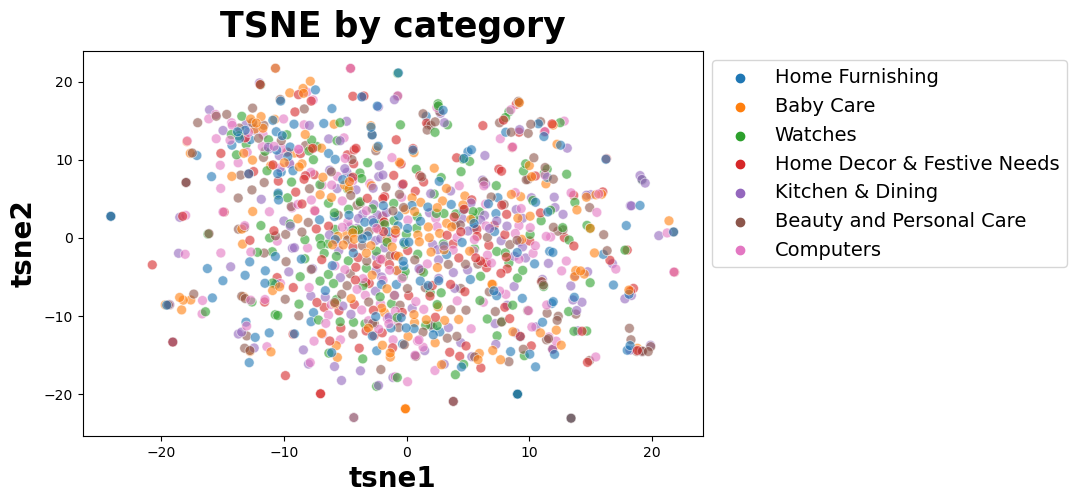

In [ ]:
plot_tsne(df_tsne, "category")

There is no obvious cluster separation by category

### Supervised learning

### Analysing differences between actual categories and predicted clusters

Creating clusters from TSNE

In [ ]:
cls = KMeans(n_clusters=7, random_state=6, n_init="auto")
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


Plotting TSNE by clusters

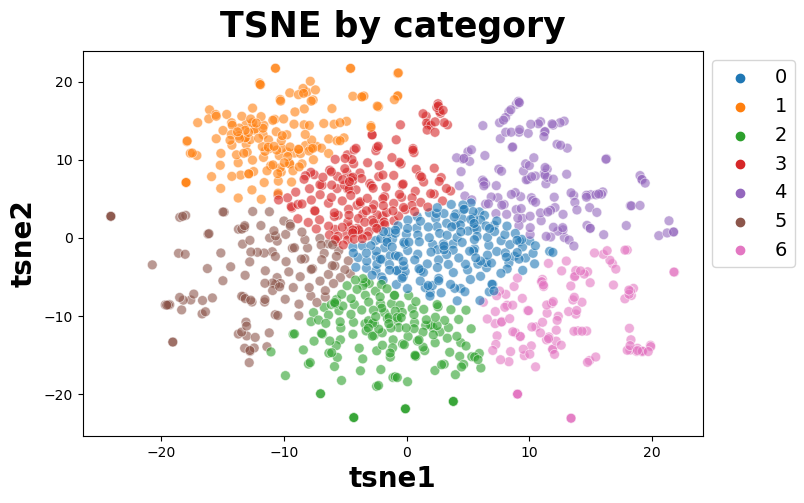

In [ ]:
plot_tsne(df_tsne, "cluster")

Calculating ARI score between clusters and categories

In [ ]:
labels = data["encoded_category"]
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

ARI :  0.0005230203748590864


The ARI score confirms the inability to successfully and confidently predict an image's category based on its features using SIFT

In [ ]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    179
1    156
2    161
3    169
4    135
5    128
6    122
Name: class, dtype: int64

In [ ]:
np.unique(cls.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [ ]:
confusion_matrix(labels, cls.labels_)

array([[25, 26, 29, 24, 17, 15, 14],
       [16, 21, 21, 25, 21, 20, 26],
       [21, 28, 30, 20, 19, 19, 13],
       [34, 16, 25, 28, 20, 12, 15],
       [26, 29, 17, 22, 17, 20, 19],
       [30, 18, 20, 23, 19, 18, 22],
       [27, 18, 19, 27, 22, 24, 13]])

              precision    recall  f1-score   support

           0       0.06      0.05      0.06       150
           1       0.07      0.09      0.08       150
           2       0.00      0.00      0.00       150
           3       0.04      0.05      0.04       150
           4       0.38      0.47      0.42       150
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       150

    accuracy                           0.10      1050
   macro avg       0.08      0.10      0.09      1050
weighted avg       0.08      0.10      0.09      1050



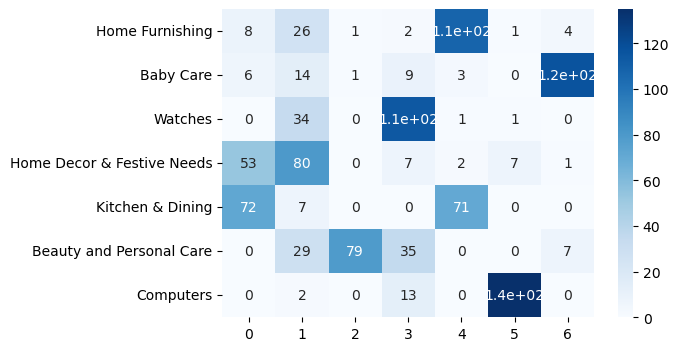

In [ ]:
def conf_mat_transform(y_true, y_pred, corresp):
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels["y_pred"] = y_pred
    labels["y_pred_transform"] = labels["y_pred"].apply(lambda x: corresp[x])

    return labels["y_pred_transform"]


cls_labels_transform = conf_mat_transform(labels, cls.labels_, [6, 5, 4, 3, 1, 2, 0])
matrix = confusion_matrix(labels, cls_labels_transform)
print(classification_report(labels, cls_labels_transform))

df_cm = pd.DataFrame(
    matrix, index=[label for label in categories], columns=[i for i in "0123456"]
)
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

The categories that were most successfully predicted are computers and home decors. 

The overall precision is pretty low 

## CNN

In [ ]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
images_features = []
i = 0
for image_file in data["image"]:
    if i % 100 == 0:
        print(i)
    i += 1
    image = load_img(path + image_file, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0])

images_features = np.asarray(images_features)

0


2023-10-08 12:19:03.866310: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100
200
300
400
500
600


/Users/amelie-dzovinar/Dev/anaconda3/envs/p6/lib/python3.11/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

In [ ]:
print("Before PCA:", images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(images_features)
print("After PCA:", feat_pca.shape)

Before PCA: (1050, 4096)
After PCA: (1050, 803)


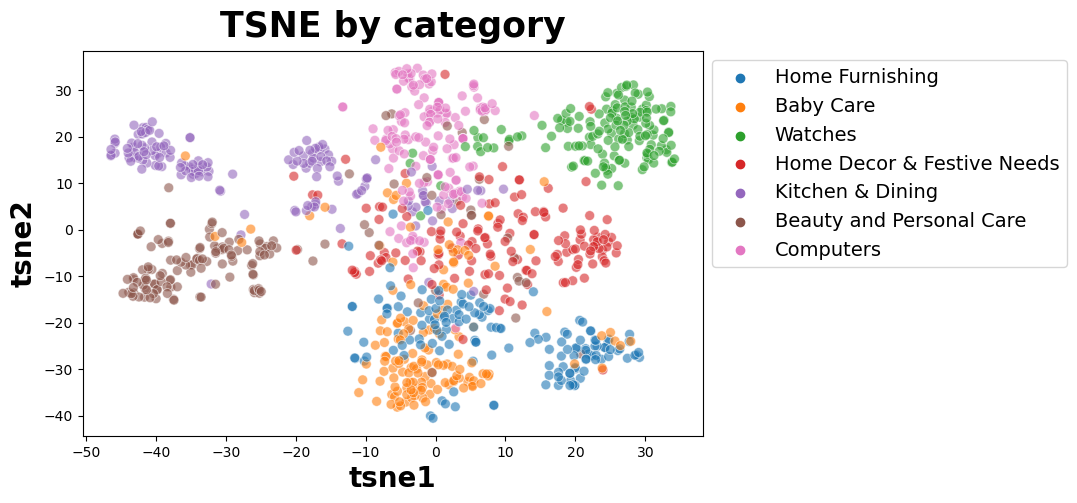

In [ ]:
tsne = manifold.TSNE(
    n_components=2, perplexity=30, n_iter=2000, init="random", random_state=6
)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne, columns=["tsne1", "tsne2"])
df_tsne["category"] = data["category"]

plot_tsne(df_tsne, "category")

The category separation is more obvious using CNN compared to the SIFT algorithm.

This suggests that using CNN it is possible to effectively predict an image's category

In [ ]:
cls = KMeans(n_clusters=7, n_init="auto")
cls.fit(X_tsne)

KMeans(n_clusters=7, n_init='auto')

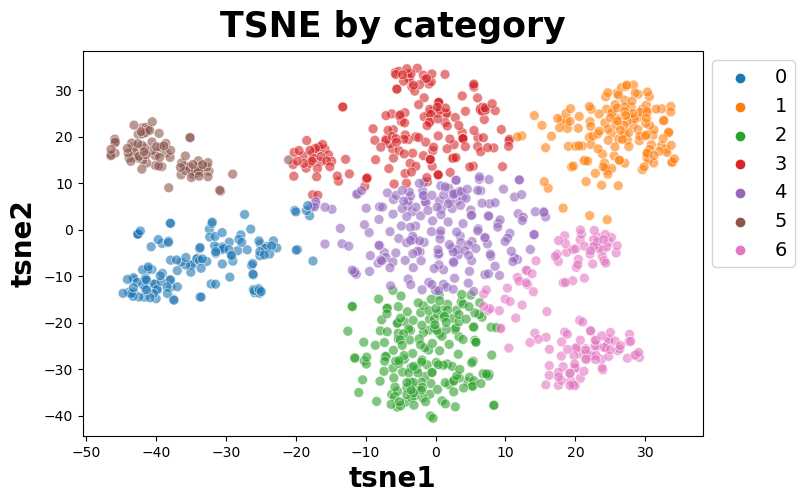

ARI :  0.4533011716355961


In [ ]:
df_tsne["cluster"] = cls.labels_

plot_tsne(df_tsne, "cluster")

labels = data["encoded_category"]
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

The ARI is much better than the one obtained with SIFT

              precision    recall  f1-score   support

           0       0.58      0.72      0.64       150
           1       0.91      0.78      0.84       150
           2       0.63      0.76      0.69       150
           3       0.42      0.53      0.47       150
           4       0.52      0.48      0.50       150
           5       0.98      0.53      0.68       150
           6       0.94      0.90      0.92       150

    accuracy                           0.67      1050
   macro avg       0.71      0.67      0.68      1050
weighted avg       0.71      0.67      0.68      1050



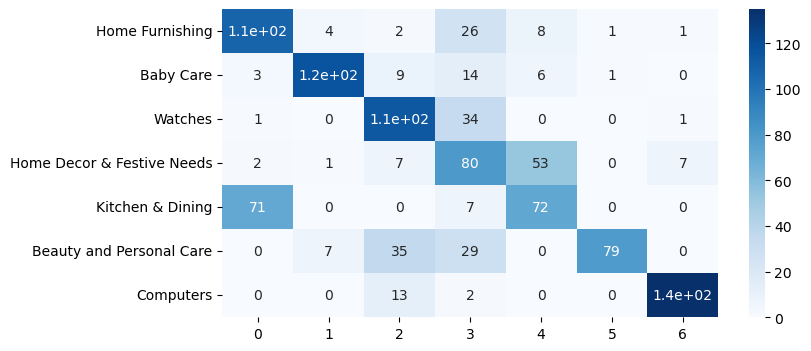

In [ ]:
matrix = confusion_matrix(labels, cls.labels_)
cls_labels_transform = conf_mat_transform(
    labels, cls.labels_, np.argmax(matrix, axis=0)
)
matrix_transform = confusion_matrix(labels, cls_labels_transform)
print(classification_report(labels, cls_labels_transform))

df_cm = pd.DataFrame(
    matrix_transform,
    index=[label for label in categories],
    columns=[i for i in "0123456"],
)
plt.figure(figsize=(8, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

The most difficult categories to predict are Kitchen and Dining, which is often misclassified as Home Furnishing, and beauty and personnal care.